<h1> OpenCV in a nutshell </h1> 

Open CV is a module built for Computer Vision, it is generally used for image and video processing and analysis.
It is particularly usefull even when dealing with data obtained from cameras and object detection.

It can be installed on the conda environment with:

In [1]:
!pip install opencv-python==4.1.2.30 #Installing this version to avoid com errors
!pip install opencv-contrib-python

it is also usefull to install

In [2]:
!conda install pyqt

Solving environment: done

# All requested packages already installed.



we can check that the installation is successfull by trying to import the module

In [3]:
import cv2 as cv
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

<h2> Working with images </h2> 

We can import image on OpenCV by running

In [4]:
img = cv.imread(cv.samples.findFile("./Data/MyCar.jpg"))

if img is None:
    sys.exit("Could not read the image.")


which can be displayed with matplotlib:

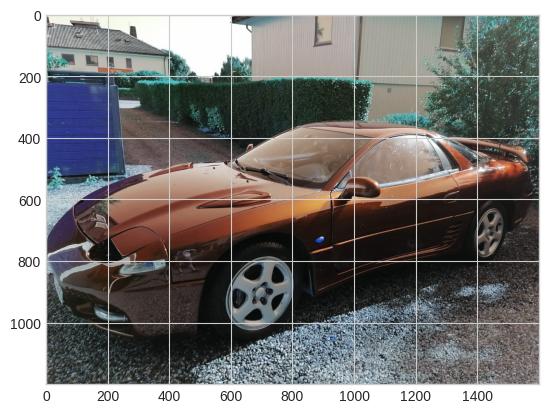

In [5]:
plt.imshow(img)

analogously, we can save the image after working on that with:

In [6]:
cv.imwrite("./Output/MyModifiedCar.jpg", img)

True

<h2> Working with videos </h2> 

When working with videos, we have two different cases to consider:

<h3> Reading the input video from a camera </h3> 

We will try to read the video from our laptop camera

In [7]:
cap = cv.VideoCapture(0) # Initializing the video capture object and associate it with our camera
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
    
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

We can apply transformations on the acquired video to match the camera position, e.g. we can flip with:

In [8]:
frame = cv.flip(frame, 0) # Flip the acquired video

the properties of the acquired video can be printed with:

In [9]:
cap.get(cv.CAP_PROP_FRAME_WIDTH)
cap.get(cv.CAP_PROP_FRAME_HEIGHT)

0.0

analogously, the same properties can be manually set using:

In [10]:
ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,320) # Manually setting the width of the video to 320
ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT,240) # Manually setting the height of the video to 240

<h3> Reading the input video from a file </h3> 

We can also load the video file from our data, the code is as follows:

In [11]:
cap = cv.VideoCapture('./Data/DriftingVideo.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()


again, we can set the properties of the video using the previously defined commands!

<h3> Saving the input video to a file </h3> 

In [12]:
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('./Output/MyInputVideo.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()